# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dataframe

In [ ]:
df = sns.load_dataset('iris')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,versicolor
96,5.7,2.9,4.2,1.3,versicolor
43,5.0,3.5,1.6,0.6,setosa
54,6.5,2.8,4.6,1.5,versicolor
147,6.5,3.0,5.2,2.0,virginica


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df = df[['sepal_length', 'petal_length', 'species']]
df.sample(5)

,sepal_length,petal_length,species
66,5.6,4.5,versicolor
88,5.6,4.1,versicolor
13,4.3,1.1,setosa
0,5.1,1.4,setosa
59,5.2,3.9,versicolor


# Apply OneHotEncoder to species

In [ ]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df[['species']])
df.sample(5)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,petal_length,species
30,4.8,1.6,0
89,5.5,4.0,1
60,5.0,3.5,1
120,6.9,5.7,2
144,6.7,5.7,2


# Train Test Split

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Softmax Regression

In [ ]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

## Prediction

In [ ]:
y_pred = clf.predict(X_test)

# Accuracy Check

In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


# New Prediction

In [ ]:
# prediction
query = np.array([[3.4, 2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

In [ ]:
clf.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Visulization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


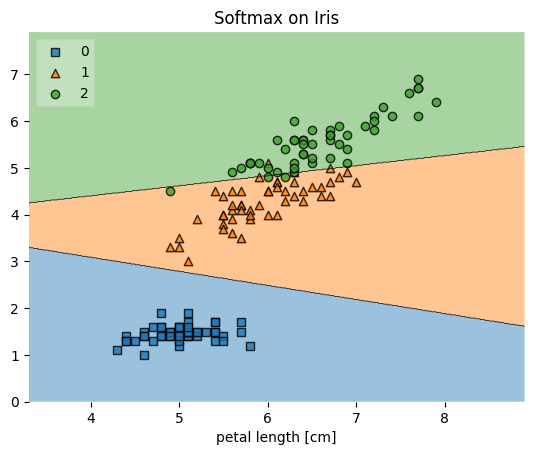

In [ ]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()
